# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anirban\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load environment variables and read api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

I checked number of Bitcoin news articles in 2020 and 2019, it gave only 1 news article each.
I also checked the volume of top headlines and again I got only one news article. Adding Canada, I got no news. Therefore, I took all the English news on Bitcoin as below

In [4]:
# Fetch the Bitcoin news articles
Btc_articles = newsapi.get_everything(q="Bitcoin OR bitcoin OR BITCOIN", language="en",page_size=100,sort_by="relevancy")
# Show the total number of news and a sample news article
print(f"Total Bitcoin articles in English: {Btc_articles['totalResults']}")
Btc_articles["articles"][0]

Total Bitcoin articles in English: 3853


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Jonathan Shieber',
 'title': 'Casa pivots to provide self-custody services to secure bitcoin',
 'description': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke…',
 'url': 'http://techcrunch.com/2020/08/06/casa-pivots-to-provide-self-custody-services-to-secure-bitcoin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/06/GettyImages-1050523528.jpg?w=600',
 'publishedAt': '2020-08-06T18:25:29Z',
 'content': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'}

In [5]:
# Fetch the Ethereum news articles
Eth_articles = newsapi.get_everything(q="Ethereum OR ethereum OR ETHEREUM", language="en",page_size=100,sort_by="relevancy")
# Show the total number of news and a sample news article
print(f"Total Ethereum articles in English: {Eth_articles['totalResults']}")
Eth_articles["articles"][0]

Total Ethereum articles in English: 1345


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in Btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
3,2020-08-07,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954
4,2020-08-17,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in Eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791
1,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
2,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819
3,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000
4,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.181844,0.086247,0.048979,0.864804
std,0.419408,0.056619,0.061145,0.076858
min,-0.865800,0.000000,0.000000,0.588000
25%,0.000000,0.045000,0.000000,0.803000
50%,0.271400,0.090000,0.000000,0.870000
75%,0.507000,0.138000,0.085000,0.910000
max,0.796400,0.210000,0.294000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.090102,0.068096,0.047681,0.884202
std,0.446787,0.071281,0.068932,0.087074
min,-0.910000,0.000000,0.000000,0.689000
25%,-0.077200,0.000000,0.000000,0.824000
50%,0.000000,0.069000,0.000000,0.889000
75%,0.447375,0.103000,0.079750,0.942750
max,0.851900,0.311000,0.309000,1.000000


# Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin mean positive score is 0.086247 which is higher than that of Ethereum which is 0.068096

Q: Which coin had the highest compound score?

A: Ethereum max compund score is 0.851900 which is better than that of Bitcoin.

Q: Which coin had the highest positive score?

A: Ethereum's max positive score is higher than that of Bitcoin's. 

Q: Which coin had the highest negative score?

A: Ethereum's max negative score is slightly higher than Bitcoin's.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw_addons = {'profanities', 'anti-Semitic', 'homophobic', 'phishing', 'cybercriminals', 'hacker', 'terrorist', 'mastermind', 'fucking'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    regex = re.compile("[^a-zA-Z ]") #any character that IS NOT a-z OR A-Z
               
    # Remove the punctuation
    re_clean = regex.sub('', text) 
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase and return only if the words in not in stopwords
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df["text"].apply(tokenizer)
#printing samples
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
1,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."
3,2020-08-07,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954,"[appears, massive, coordinated, strike, reddit..."
4,2020-08-17,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931,"[london, reuters, bitcoin, jumped, highest, ye..."


In [14]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
#printing samples
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819,"[london, reuters, sounds, like, surefire, bet,..."
3,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000,"[new, york, reuters, brooklynbased, technology..."
4,2020-08-19,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, shows, aff..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = []

for i in btc_df["tokens"]:
    btc_ngram += i
# Printing top 10 Bitcoin bigrams in a dataframe
pd.DataFrame(list(dict(Counter(ngrams(btc_ngram, n=2)).most_common(10)).items()), columns=['Bitcoin Top 10 bigrams', 'count'])

,Bitcoin Top 10 bigrams,count
0,"(satoshi, nakaboto)",38
1,"(wireless, charging)",32
2,"(chars, robot)",19
3,"(robot, colleague)",19
4,"(colleague, satoshi)",19
5,"(nakaboto, writes)",19
6,"(writes, bitcoin)",19
7,"(every, daywelcome)",19
8,"(daywelcome, another)",19
9,"(another, edition)",19


In [18]:
# Generate the Ethereum N-grams where N=2
eth_ngram = []

for i in eth_df["tokens"]:
    eth_ngram += i
# Printing top 10 Ethereum bigrams in a dataframe
pd.DataFrame(list(dict(Counter(ngrams(eth_ngram, n=2)).most_common(10)).items()), columns=['Ethereum Top 10 bigrams', 'count'])

,Ethereum Top 10 bigrams,count
0,"(chars, ethereum)",19
1,"(ethereum, classic)",12
2,"(decentralized, finance)",11
3,"(finance, defi)",9
4,"(btc, trading)",6
5,"(trading, around)",6
6,"(ethereum, miners)",6
7,"(ethereum, blockchain)",6
8,"(price, bitcoin)",4
9,"(chars, bitcoin)",4


In [19]:
# Get the top 10 words for Bitcoin
pd.DataFrame(list(dict(token_count(btc_ngram)).items()), columns=['Bitcoin Top 10 words', 'count'])

,Bitcoin Top 10 words,count
0,chars,96
1,bitcoin,69
2,satoshi,38
3,nakaboto,38
4,wireless,32
5,charging,32
6,today,21
7,youve,21
8,every,20
9,another,20


In [20]:
# Get the top 10 words for Ethereum
pd.DataFrame(list(dict(token_count(eth_ngram)).items()), columns=['Ethereum Top 10 words', 'count'])

,Ethereum Top 10 words,count
0,chars,94
1,ethereum,65
2,bitcoin,24
3,blockchain,19
4,defi,15
5,decentralized,15
6,network,14
7,cryptocurrency,12
8,classic,12
9,attack,12


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

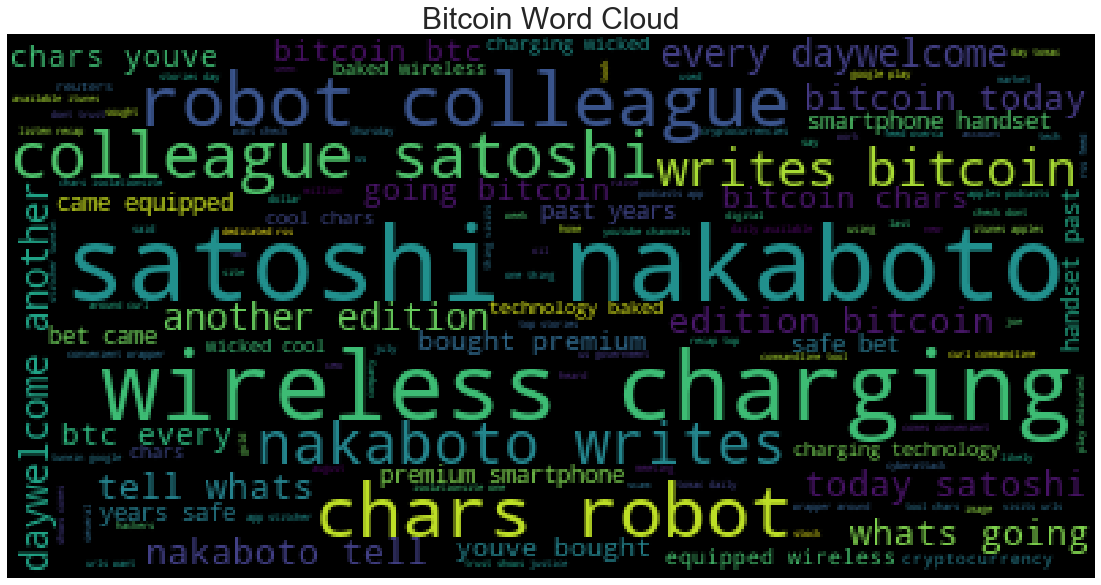

In [37]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_ngram))
plt.title("Bitcoin Word Cloud", fontsize=30)
plt.imshow(btc_wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

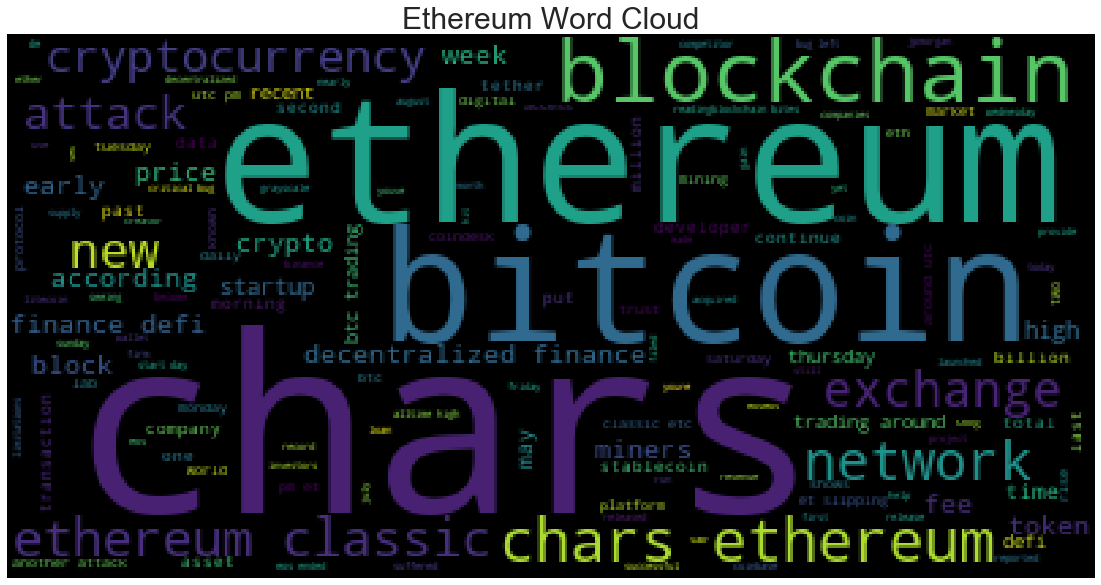

In [38]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(eth_ngram))
plt.title("Ethereum Word Cloud", fontsize=30)
plt.imshow(eth_wc)
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
all_btc_text = ' '.join(btc_df.text.to_list())
# Print the Bitcoin concatenated text
all_btc_text

'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars] The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn\'t given the entire ZIP f… [+2880 chars] “The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars] In what appears to be a massive coordinated strike against Reddit, hackers took over dozens of pages on Friday afternoon, using their access to plaster pro-Donald Trump imagery across subreddits with… [+3494 chars] LONDON (Reuters) - Bitcoin jumped to its highest in over a year on Monday, adding to a 2020 rally that has seen it more than treble in pri

In [30]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [32]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
btc_entities

['Casa',
 'Colorado',
 'Coinbas',
 'VPN',
 'Reddit',
 'LONDON',
 'Reuters',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Blockfolio',
 'FTX',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Sanders Morris Harris',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoi

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
all_eth_text = ' '.join(eth_df.text.to_list())
# Print the Bitcoin concatenated text
all_eth_text

'If you\'ve interacted with cryptocurrencies in the past couple of years, there\'s a good chance you\'ve used MetaMask. It\'s a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn\'t necessarily king anymore. You\'ve probably heard that cryptocurrency and bloc… [+1286 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. \r\nAs part of the dea… [+1915 chars] An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe p

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)
# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [36]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
eth_entities

['LONDON',
 'Reuters',
 'Reuters',
 'Brooklyn',
 'ConsenSys',
 'JPMorgan Chase &amp',
 'Bitcoin',
 'BTC',
 'UNUS SED LEO',
 'LEO',
 'The Galaxy Digital',
 'Fed',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'bitcoin',
 'Ethereum',
 'Bitcoin',
 'Bitcoin',
 'Ethereum (ETH',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'BTC',
 'Bitcoin',
 'BTC',
 'cLabs',
 'DeFi',
 'ul><li',
 'Bitcoin',
 'BTC',
 'Ethereum (',
 'Ethereum Classic',
 'Bitcoin',
 'Bitcoin',
 'BTC',
 'Bitmain',
 'the Tor Network',
 'Bitcoin',
 'Twitter',
 'DisclosureThe',
 'DEFI',
 'DeFi',
 'JPMorgan Chase',
 'ConsenSys',
 'Brooklyn',
 'JPMorgan',
 'un',
 'INX',
 'Tron to Ethereum',
 'bitcoin',
 'Blockchai',
 'the U.S. Office of the Comptroller of the Currency',
 'OCC',
 'Bitcoin',
 'DeFi',
 'Bitcoin',
 'BTC',
 'the Ethereum 2.0',
 'OMG Network',
 'CoinGecko',
 'Emfarsis',
 'Bitcoin',
 'BTC',
 'USDT',
 'U.S.',
 'Ethereum Classics',
 'DeFi',
 'DG Lab',
 'Ethereum Classic',
 'ETC',
 'the 0x exchange',
 'Chainlink',
 'Arbol'

---